In [30]:
import numpy as np # helps with linear algebra

In [31]:
import pandas as pd # pandas are used in data processing, importing CSV file


In [32]:
import matplotlib.pyplot as plt #used for ploting maps


In [33]:
import seaborn as snb

In [34]:
import string

In [35]:
data = pd.read_csv('joblist1.csv')

In [36]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [38]:
data.drop(['job_id'  , 'telecommuting' , 'has_company_logo' , 'has_questions'] , axis = 1,inplace = True)

In [39]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [40]:
data.fillna(' ',inplace=True)

In [41]:
data.isnull().sum() # checking for null characterr

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

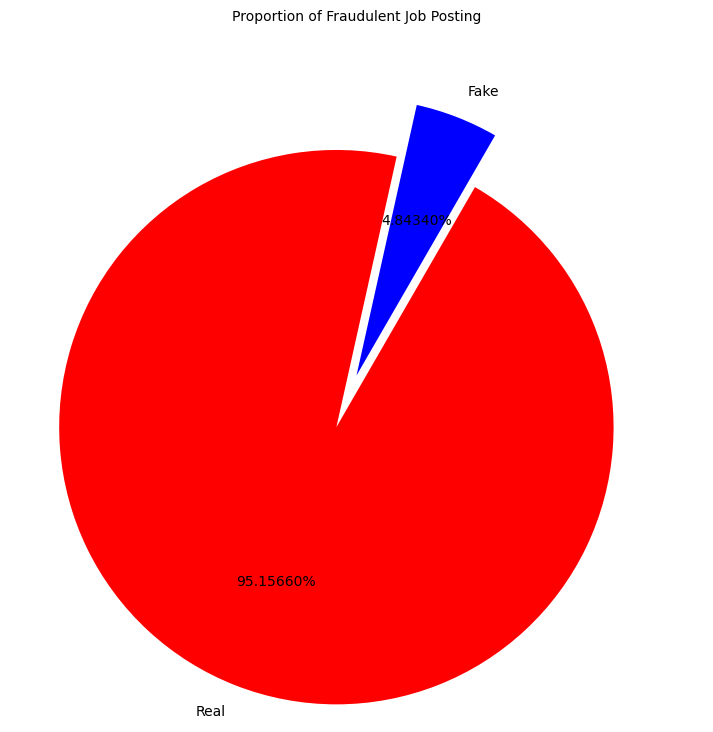

In [42]:
#explode moves the part of pie away from center and size tell the no. of real and fake jobs
labels = 'Fake','Real'
sizes= [data.fraudulent[data["fraudulent"]==1].count(), data.fraudulent[data["fraudulent"]==0].count()]
explode=(0,0.2)
fig1,ax1 = plt.subplots(figsize=(12,9))
colors=['blue','red']
ax1.pie(sizes,explode =explode,colors =colors,labels =labels,autopct='%1.5f%%',startangle=60)
ax1.axis('off')
plt.title("Proportion of Fraudulent Job Posting" ,size =10)
plt.show()

In [43]:

def split(location):
  l =location.split(',')
  return l[0]

data['country'] =data.location.apply(split)  


In [44]:
from collections import Counter

In [45]:
us_jobs= data[data['country']=='US']

In [46]:
common_jobs= Counter(us_jobs['title']).most_common(10)

In [47]:
us_jobs.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0,US
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,Accounting Clerk,"US, MD,",,,,Job OverviewApex is an environmental consultin...,,,,,,,,0,US


In [48]:
for title, count in common_jobs:
    print(f"{title} : {count} jobs")
    # most common jobs in US

English Teacher Abroad  : 295 jobs
Graduates: English Teacher Abroad (Conversational) : 144 jobs
Customer Service Associate  : 136 jobs
English Teacher Abroad : 89 jobs
English Teacher Abroad (Conversational) : 83 jobs
Customer Service Associate - Part Time  : 74 jobs
Graduates: English Teacher Abroad  : 55 jobs
Software Engineer : 46 jobs
Customer Service Representative : 43 jobs
Administrative Assistant : 42 jobs


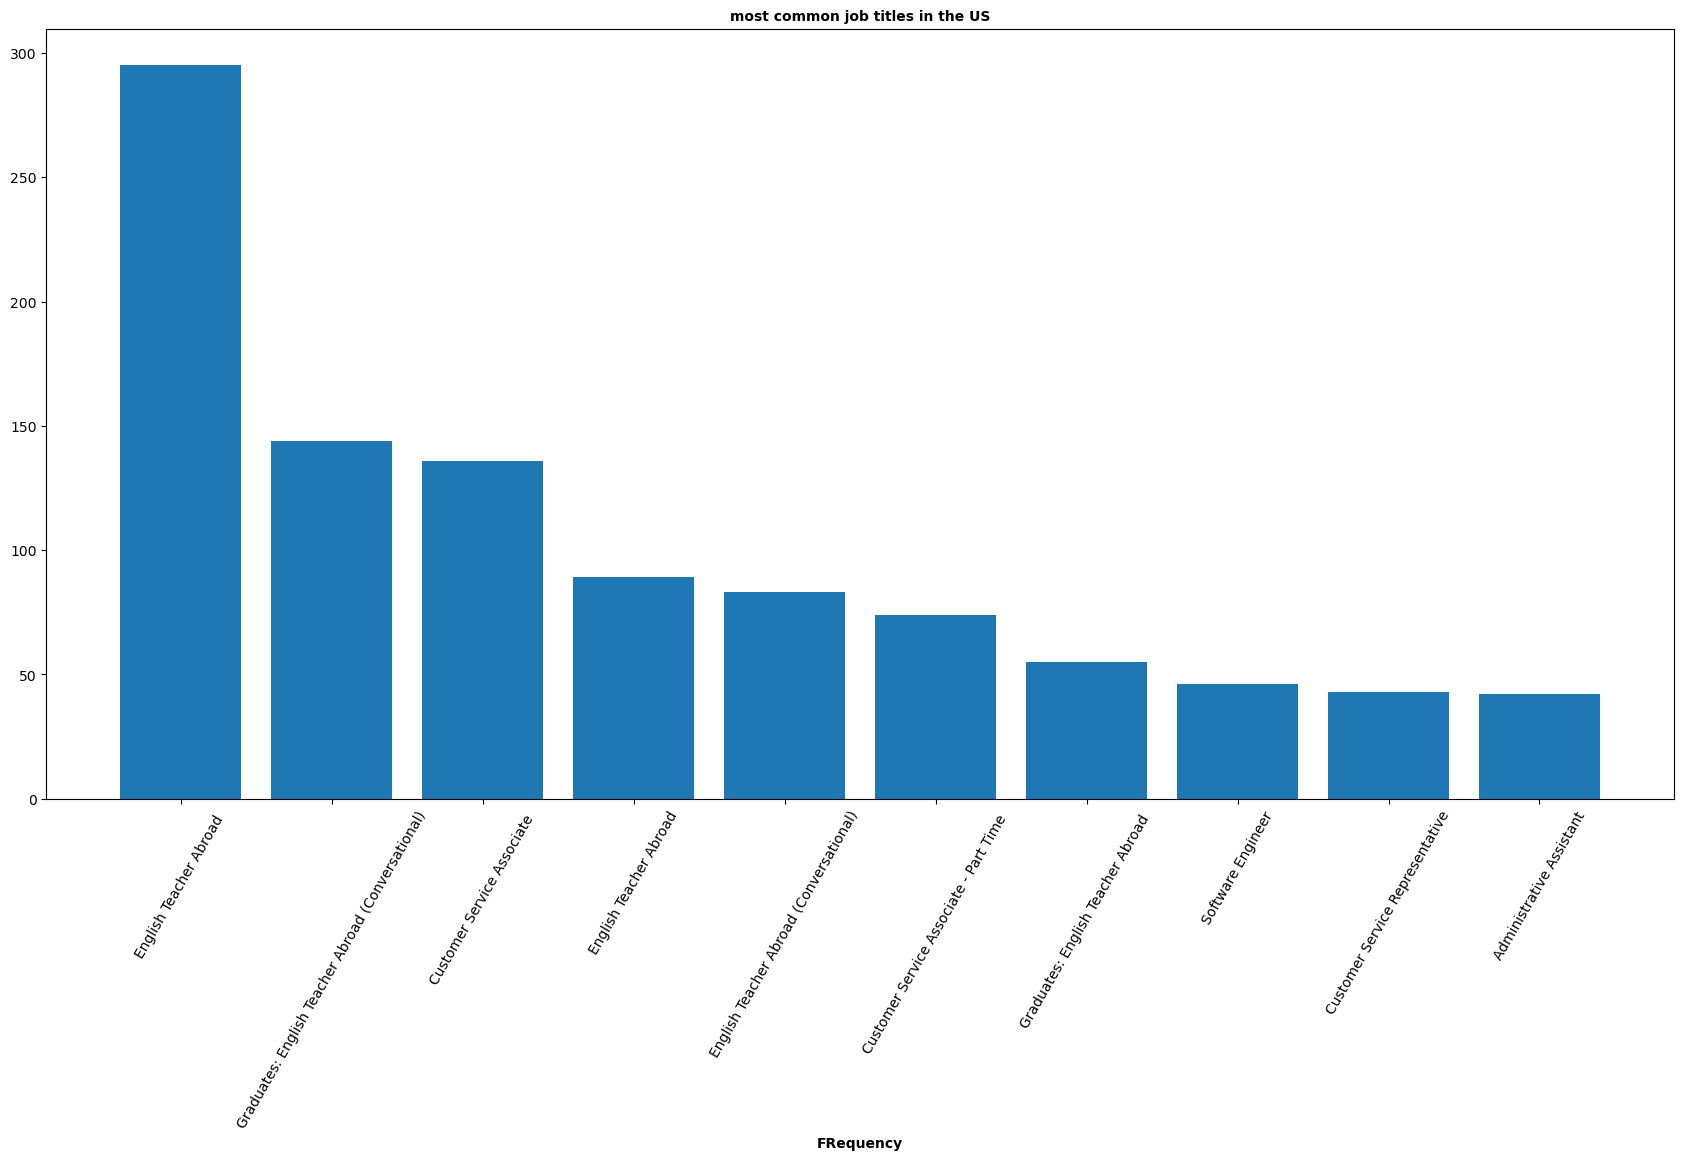

In [49]:
title, count = zip(*common_jobs)
plt.figure(figsize=(21,10))
plt.bar(title,count)
plt.xlabel('Job Title',fontweight='bold',size=10)
plt.xlabel('FRequency',fontweight='bold',size=10)
plt.title('most common job titles in the US',fontweight='bold',size=10)
plt.xticks(rotation=60)
plt.show()

In [50]:
print("question no. 2 most common Fake job")
fakecom_jobs= data[data['fraudulent']== 1]
fakecom_jobs.head()

question no. 2 most common Fake job


,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US
144,Forward Cap.,,,,,The group has raised a fund for the purchase o...,,,,,,,,1,
173,Technician Instrument & Controls,US,Power Plant & Energy,,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1,US
180,Sales Executive,"PK, SD, Karachi",Sales,,,Sales Executive,Sales Executive,Sales Executive,,,,,Sales,1,PK
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1,US


In [51]:
from collections import Counter
commonfake_jobs= Counter(fakecom_jobs['title']).most_common(10)

In [52]:
for title, count in commonfake_jobs:
    print(f"{title} : {count} jobs")
    # most common fake jobs 

Data Entry Admin/Clerical Positions - Work From Home : 21 jobs
Cruise Staff Wanted *URGENT* : 21 jobs
Home Based Payroll Typist/Data Entry Clerks Positions Available : 21 jobs
Customer Service Representative : 17 jobs
Administrative Assistant : 16 jobs
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily  : 12 jobs
Payroll Data Coordinator Positions - Earn $100-$200 Daily  : 10 jobs
Account Sales Managers $80-$130,000/yr : 10 jobs
Payroll Clerk : 10 jobs
Network Marketing : 10 jobs


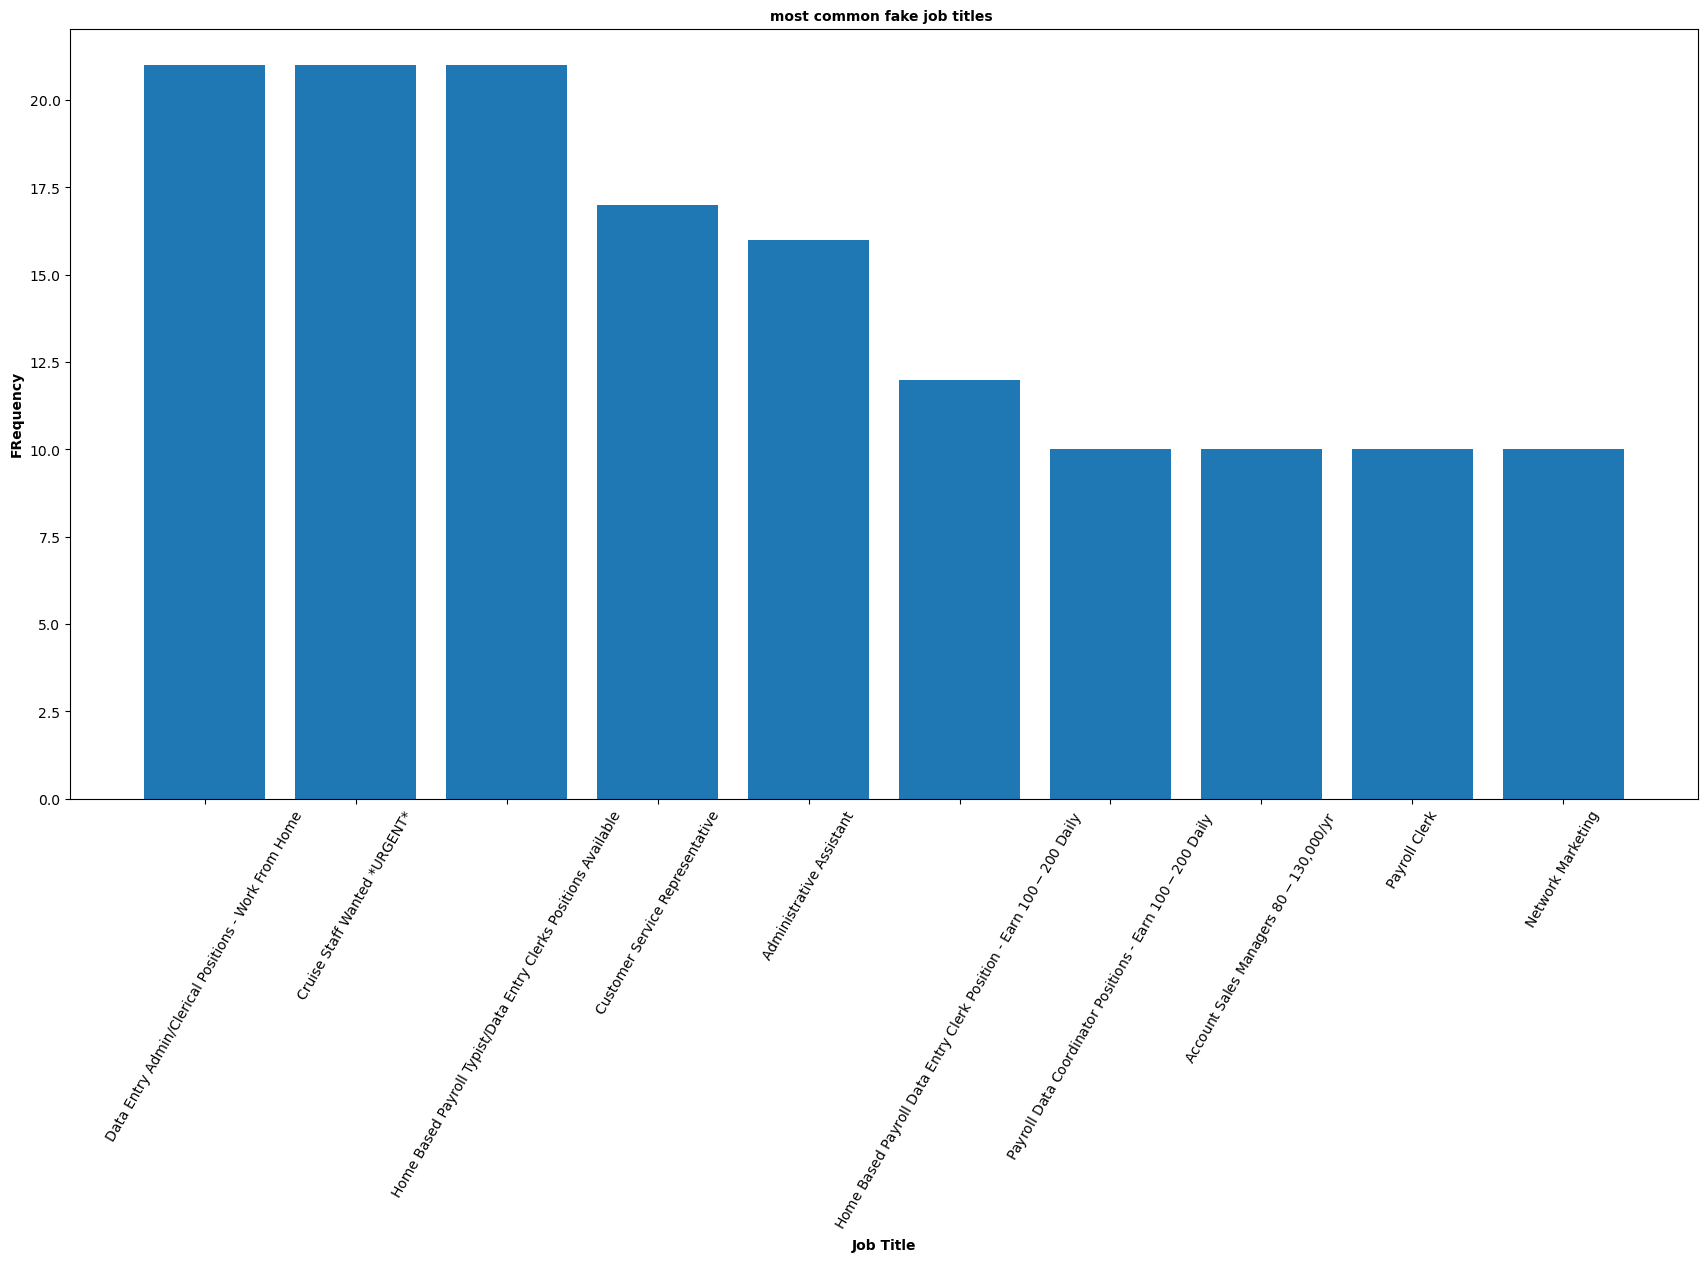

In [53]:
title, count = zip(*commonfake_jobs)
plt.figure(figsize=(21,10))
plt.bar(title,count)
plt.xlabel('Job Title',fontweight='bold',size=10)
plt.ylabel('FRequency',fontweight='bold',size=10)
plt.title('most common fake job titles ',fontweight='bold',size=10)
plt.xticks(rotation=60)
plt.show()
# there is no title available in the data given for most common fake job

In [54]:
us_jobs= data[data['country']=='US']


In [55]:
us_jobs.tail()


,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
17872,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,Full-time,,,Internet,Product Management,0,US
17873,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,Contract,,,Utilities,,0,US
17874,JavaScript Developer,"US, ,",,80000-100000,,"Sr, JavaScript Developer Experience : 4-10 yea...",,,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,US
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,Full-time,,,,,0,US


In [62]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [63]:
real_post = ' '.join([str(text) for text in data['company_profile']])

In [64]:
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords dataset if you haven't already
nltk.download('stopwords')

# Assuming you have 'real_post' as a string
# Tokenize the string into words
words = real_post.split()

# Get the list of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Filter out stopwords
filtered_words = [word for word in words if word.lower() not in stop_words]

# Reconstruct the text without stopwords
filtered_real_post = ' '.join(filtered_words)

# Print the text without stopwords
print(filtered_real_post)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
from collections import Counter

# Tokenize the string by splitting it into words
words = filtered_real_post.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the three most common words and their frequencies
most_common_words = word_counts.most_common(3)

print("The three most common words are:")
for word, count in most_common_words:
    print(f"{word}: {count} times")

The three most common words are:
work: 5826 times
team: 5803 times
people: 5253 times


In [66]:
data.head()
# 'data' dataframe has concatinated values




,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [69]:
data['text'] = data['title'] + ' '+ data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' '+ data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['employment_type']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [71]:
data.columns

Index(['salary_range', 'fraudulent', 'text'], dtype='object')

In [72]:
del data['salary_range']

In [73]:
data.head()
# 'data' dataframe has concatinated values

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [76]:
stop_words = set(stopwords.words("english"))
data['text'] = data['text'].apply(lambda x:x.lower())
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))
data['text'][0]

"marketing intern us, ny, new york marketing we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging exi

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(data.text, data.fraudulent ,test_size =0.3)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [80]:
X_train_dtm = vect.transform(X_train) #text to vector

In [81]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [82]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86121 sparse matrix of type '<class 'numpy.int64'>'
	with 979892 stored elements in Compressed Sparse Row format>

In [83]:
# Naive Bayes Classifier 

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [84]:
y_pred_nb = nb.predict(X_test_dtm)

In [85]:
# it tell the accuracy score
y_pred_nb = nb.predict(X_test_dtm)

In [86]:
accuracy_score(y_test,y_pred_nb)

0.976882923191648

In [87]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [88]:
y_pred_dt = dt.predict(X_test_dtm)

In [102]:
X_test

,text
7575,enterprise product evangelist (remote/telecomm...
7724,"german translator/tester ca, qc, montreal qa t..."
13015,oud 11: summaview zoekt een business controlle...
11646,"operations team leader au, vic, melbourne sele..."
12273,"senior database engineer ar, , willdom top not..."
...,...
5074,"ui developers ca, on, toronto clarify requirem..."
3371,"angularjs,html5 css front end developer gb, ri..."
10513,"ux / information architect fr, j, paris design..."
15964,"health safety environmental manager us, mn, mi..."


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [104]:
y=data.fraudulent
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [105]:
X=data.drop('fraudulent',1)
print(X.head())

                                                text
0  marketing intern us, ny, new york marketing we...
1  customer service - cloud video production nz, ...
2  commissioning machinery assistant (cma) us, ia...
3  account executive - washington dc us, dc, wash...
4  bill review manager us, fl, fort worth spotsou...


C:\Users\robin\AppData\Local\Temp\ipykernel_2788\1407801117.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('fraudulent',1)


In [106]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12516, 1) (12516,)
Test set: (5364, 1) (5364,)


In [107]:
input_text = ['general laborers us, ct, hartford elite environmental group llc. provides staffing services temporary employment opportunities wide range clients, business owners search employees, candidates search employment environmental, construction industry. elite environmental group currently hiring general laborers, construction, housekeeping, manufacturing associates temporary temporary hire positions, paying $9.00 - $13.00 per hour. you’re dependable looking work, contact elite environmental group today. job descriptionconstruction erect dismantle scaffolding, shoring, braces, traffic barricades, ramps, temporary structuresmanufacturing associate receive count stock items, record data manually using computer.general labor clean prepare construction sites eliminate possible hazards.pack unpack items stocked shelves stockrooms, warehouses, storage yards.housekeeper clean guest rooms common areasmark stock items using identification tags, stamps, electric marking tools, labeling equipment. ideal candidatesrelevant experience preferredreliable transportationcommitted safety timesexcellent attendance']


In [108]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category") 

This advertisement belonging to real job post category


In [121]:
input_text = ['Data Entry Admin/Clerical Positions - Work From Home']

In [122]:
input_data = vect.transform(input_text)

prediction = dt.predict(input_data)

if (prediction[0] == 1):
  print("This advertisement belonging to fake job post category")
  
else:
  print("This advertisement belonging to real job post category")  

This advertisement belonging to real job post category


In [ ]:
#summary
Project Title: Fraudulent Job Postings

Project Overview:
The "Fraudulent Job Postings" project is dedicated to employing ensemble machine learning techniques to differentiate between authentic and fraudulent job postings based on an available dataset. It encompasses a series of pivotal steps, including data preprocessing, exploratory data analysis, the development of machine learning models, and answering specific questions regarding the dataset.

Key Steps in the Project:

Data Ingestion and Exploration:

This project begins with the loading of the dataset using Pandas, followed by a comprehensive exploration of its fundamental attributes, such as its dimensions, data types, and statistical characteristics.

Data Cleansing and Transformation:

Data preprocessing is a crucial phase in this project, encompassing the handling of missing values and the removal of redundant columns that do not contribute to the classification objective.

Data Visualization:

The project employs data visualization techniques to gain valuable insights from the dataset, such as utilizing a pie chart to illustrate the distribution of fraudulent job postings.

Processing Textual Data:

Effective handling of textual data is essential for the construction of robust machine learning models. This phase encompasses text cleaning, tokenization, the elimination of stopwords, and the transformation of text data into a format suitable for model training.

Feature Engineering:

Textual data is merged with other relevant features to construct a comprehensive text feature for subsequent model training.

Model Development:

The project entails the creation of two classification models: a Naive Bayes Classifier and a Decision Tree Classifier. Both models are trained and assessed through a dataset division into training and testing subsets.

Model Evaluation:

Model performance is evaluated using various metrics, including accuracy, providing a basis for the comparison of the two models.

Real-time Job Postings Classification:

The trained models are deployed to classify new job postings as either genuine or fraudulent. Users can input job posting text, and the models make predictions based on their training data.

Project Conclusion:

The "Fraudulent Job Postings" project effectively demonstrates the application of ensemble machine learning models to classify job postings into two distinct categories: genuine and fraudulent. It offers a practical solution for businesses to detect potentially fraudulent job advertisements and mitigate the risks associated with fake job postings.

With a comprehensive approach that encompasses data analysis, textual data processing, model development, and real-time prediction capabilities, this project proves to be a valuable tool for HR departments and online job platforms.